# 🎚 PACF
*Are they twin brothers? they are... but with a small twist 🥨*

Yeah, till now we have learnt the ways to find the `d` and `q` with *ADF test* and *ACF* respectively. Now it is time to **find the `p`**. PACF is for `p` and not for `q`. While ACF is for `q` and not for `p`. The reasons will be clear once we understand the difference between them.

## 🍎🍎 Similarities
- It is the graph same as ACF
- The way to determine the value of `p` is just same like we did in ACF.
- We choose different $\tau$ and then plot the *autocorrelation* on the y-axis.
- Choose the highest $\tau$ after which all values are small.

No it is not Déjà-vu but as said, *they are the twins with some twist*.

## 🍎🍏 Dis-similarities
- It is calculated **differently**.
- It is based on **all values** from $y_{t}$ till $y_{t+\tau}$.
- Meaning if we have the series like: $1, 4, 6, 7, 3, 22, 5, 34$ and if our $\tau = 4$ then we will take $3, 22, 5, 34$ into consideration when calculating PACF unlike only $2$ values $3$ \& $34$ in ACF.
- Thus PACF considers the **middle values** as well.

### What is it?
> The PACF at the lag $\tau$ is the autocorrelation <u>between</u> $y_t$ and $y_{t+\tau}$ ***conditioned*** on $y_{t}, y_{t+1}, y_{t+2}, \cdots, y_{t+\tau-1}, y_{t+\tau}.$

- This is the ***conditional*** autocorrelation.
- The ACF was ***unconditional***. 
- That means, the PACF has conditions on the values between $y_{t}$ till $y_{t+\tau}$.

Recall, we used the latter "$\varrho$" to denote the ACF before. Here, we will denote PACF with "$\varphi$". Yeah we have seen that before as a coefficient in `AR(p)` model. It is fine, don't mix them.

## 🎦 Representation of $\varphi$

We usually show that with *double indices*. Meaning double-tau. 

## $$\varphi(\tau, \tau): \text{PACF at lag } \tau$$

**There,**<br>
If $\tau = 0$ then $\varphi(0, 0)$ will be *same* as $\varrho(0)$ or ACF at $\tau=0$. Because there are no other elements in between if $\tau$ is 0.

Thus, <br>
$\varphi(0, 0) = \varrho(0) = 1$
<br>———<br>
**If,** <br>
$\tau = 1$ then our $\varphi(1, 1)$ will not have any value between $y_t$ and $y_{t+1}$. Thus, it will be same as ACF.

Thus, <br>
$\varphi(1, 1) = \varrho(1)$

*Please don't get confused with the $\tau$ gets repeated. They mean the same thing, just written twice.*

###### 

## ⛓ 2 autoregressions
*Sometimes I really find a perfect emoji 😉*

> Here we will have to run 2 different autoregressions.

<img src="../images/2_autoregressions.png" height=300 width=600>

Meaning, <br>
Now we will build the autoregressive models for $y_{t}$ ***and also*** for $y_{t+\tau}$.

Thus, the equation for $y_{t+\tau}$ will be:

# $$\hat y_{t+\tau} = \beta_0 + \beta_1 y_{t+1} + \beta_2 y_{t+2} + \cdots + \beta_{\tau - 1} y_{t+\tau-1}$$

Look, how is it made: <br>
<img src="../images/pacf-1.png" height=300 width=500>

___

Similarly, the equation for $y_{t}$ will be:

# $$\hat y_{t} = \beta_0' + \beta_1' y_{t+1} + \beta_2' y_{t+2} + \cdots + \beta_{\tau - 1}' y_{t+\tau-1}$$

And, it is: <br>
<img src="../images/pacf-2.png" height=300 width=500>

That's the same! Yeah! 

Of course, it will look like the they **both are being predicted with the same set of variables**. And that is truth. That is *also* kind of the multi-target regression which I have been researching on now-a-days 😉. But see, that the ***coefficients are different*** which is a big OF COURSE.

> This looks like we are using the **future values** to predict **the past** when $y_t$ is considered.

## 🧝‍♂️ The biggest reveal
Till now I have been hiding the ***main*** formulae for the PACF. But we were waiting for this moment. Now it is.

# $$\varphi(\tau, \tau) = corr\left(y_t - \hat y_t, y_{t+\tau} - \hat y_{t+\tau} \right)$$

**સાચ્ચે? 😮** Wow! <br>
મજા ન આવી? આગળનું વાંચ.

> *The PACF between $y_t$ and $y_{t-\tau}$ is only the **correlation between their errors/noises**.*

Wait, what did just I say? <br>
Exactly, the **correlation between the noises or simply the errors.**
<br>—<br>
So to summarize it, *please pay attentions it is required*:
1. We trained 2 models with same set of variables to predict $y_t$ and $y_{t+\tau}$
2. We got their predictions as $\hat y_t$ and $\hat y_{t+\tau}$
3. Calculated their *errors*.
4. Found their correlations... and that's how it is done!

### But what about the in between values?
Yeah, since the starting of this notebook we have been discussing how PACF is considering the in-between values. But in the final reveal we just took the two "*edge points*" and found the correlations! That is the same as ACF!

But to get those errors, *we will need the in-between* points! Thus, they are helpful in predicting those points.

### What does exactly that correlation between errors tell?
- The correlation is the relation between $y_t$ and $y_{t+\tau}$ that ***can't be explained*** by the in-between values.
- Thus, if the correlation between those errors is **non-zero** that means **there is a significant relation** between $y_t$ and $y_{t+\tau}$.
- Think like this, if the in between values are able to explain $y_t$ and $y_{t+\tau}$, then the error will be low or 0. Thus, the correlation between them will be 0. And that will mean that we shouldn't include $y_t$ to the future values! Should chose another `p`.
- **But if** the correlation between errors is non-zero, then that means the dependency of the future value is ***directly*** dependent somehow ***that can't be explained by the in-between values***. Thus, we should consider taking that past `p` values into an account.

That's how we choose our `p`.

<img src="../images/direct-effect.png" height=200 width=300>

## 🎬 Action! Code!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

I think you have understood the concept from the theory discussed above. Not? Not clear? No problem! The following experiments will make things much clearer for you.

From now, we will see *how the data we've made with custom dependencies on the previous `p` terms shows up in the PACF plot*. 

In [2]:
# since it is an experiment with randomness, let's set the seed
seed = np.random.RandomState(1)

# generating just the simple data which has *no dependency* on the previous term
x = seed.randn(1000)

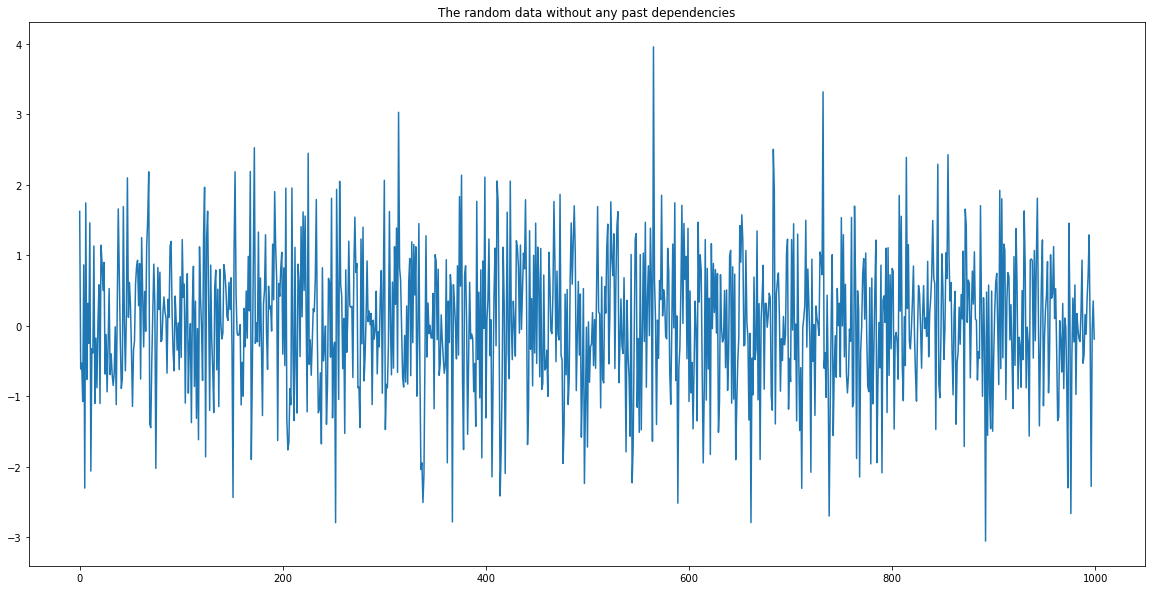

In [3]:
plt.plot(x)
plt.title("The random data without any past dependencies");

**Suppose**, if this were our data of a time-series, then what `p` would we take? <br> 4? 2? 1? Nah! It would be `0`.

Because the *fact that we know* that it **doesn't depend** on the past values. This would be a straight random walk! But in the real-world we don't know that. So let's see how PACF does that for us.

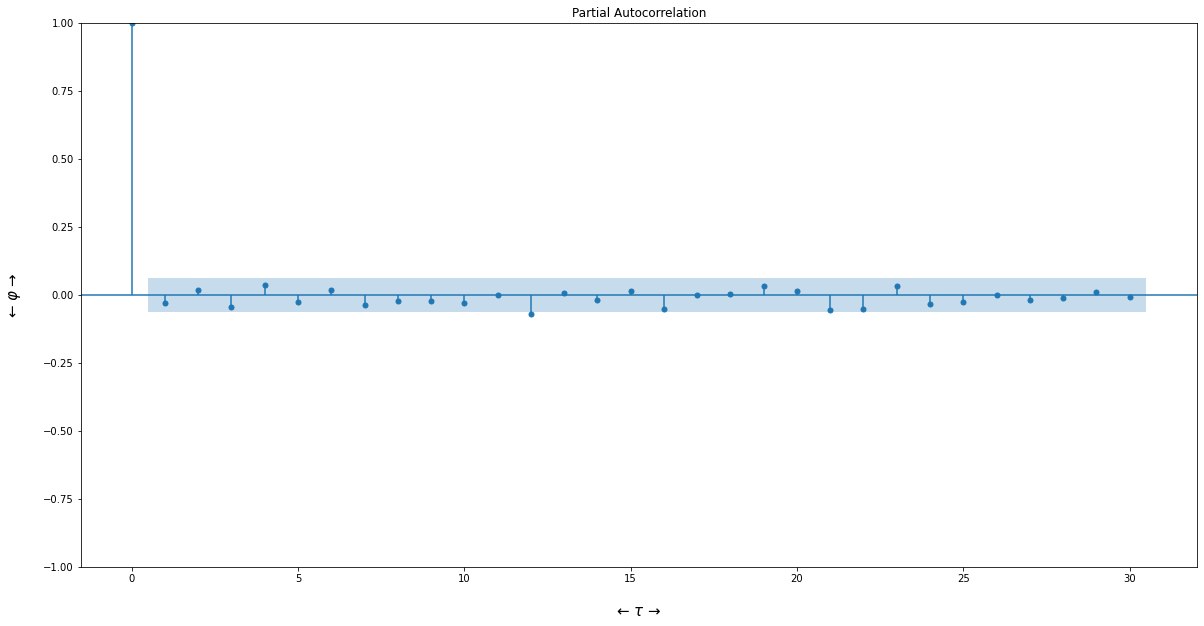

In [4]:
ax = plt.axes()
plot_pacf(x, method="ywm", ax=ax)
ax.set_xlabel("← $\\tau$ →", labelpad=20, fontdict={"size":15})
ax.set_ylabel("← $\\varphi$ →", labelpad=20, fontdict={"size":15});

As expected! Isn't? <br>
So in this scenario we will choose `p` as 0. Looks amazing!

#### Making data based on past 1 value

In [5]:
# the data initialized with 0
x1 = [0]

# this loop will generate new data point which is
# based on past 1 data point
for i in range(1000):
#               ↓ coef          ↓ std
    new_point = 0.4 * x1[-1] +  2 * seed.randn()
    x1.append(new_point)
    
x1 = np.array(x1)

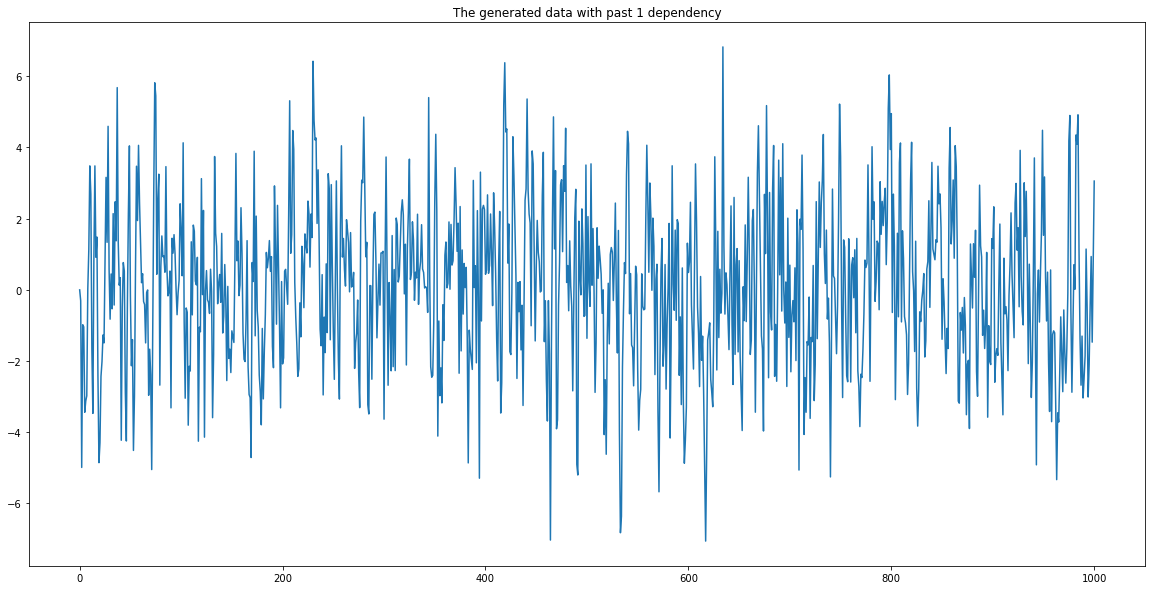

In [6]:
plt.plot(x1)
plt.title("The generated data with past 1 dependency");

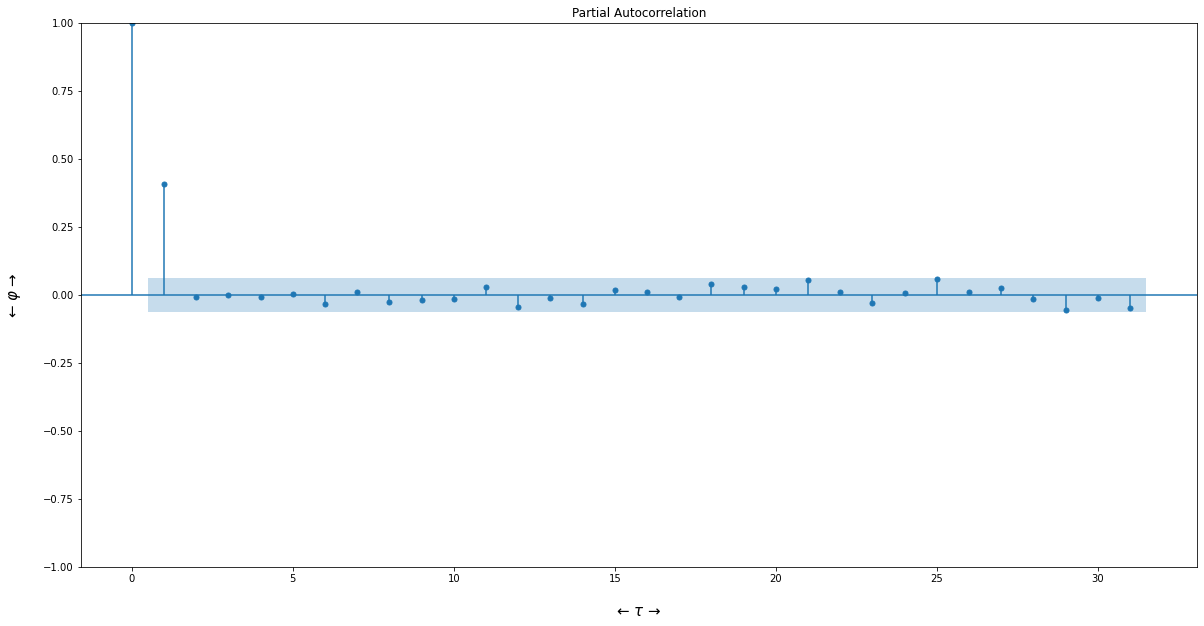

In [7]:
ax = plt.axes()
plot_pacf(x1, method="ywm", ax=ax)
ax.set_xlabel("← $\\tau$ →", labelpad=20, fontdict={"size":15})
ax.set_ylabel("← $\\varphi$ →", labelpad=20, fontdict={"size":15});

We are getting it guys! Here the results are exactly we would expect to see!

There we see the peak where $\tau=1$. That means if we had no idea about the data, we would have considered the `p` as `1`. Though the data here looks same as the random data but internally they are related which is not visible through eyes.

#### Making data based on past 1 value but negative coef

In [8]:
x1 = [0]
for i in range(1000):
#               ↓ -ve coef
    new_point = -0.4 * x1[-1] +  2 * seed.randn()
    x1.append(new_point)
    
x1 = np.array(x1)

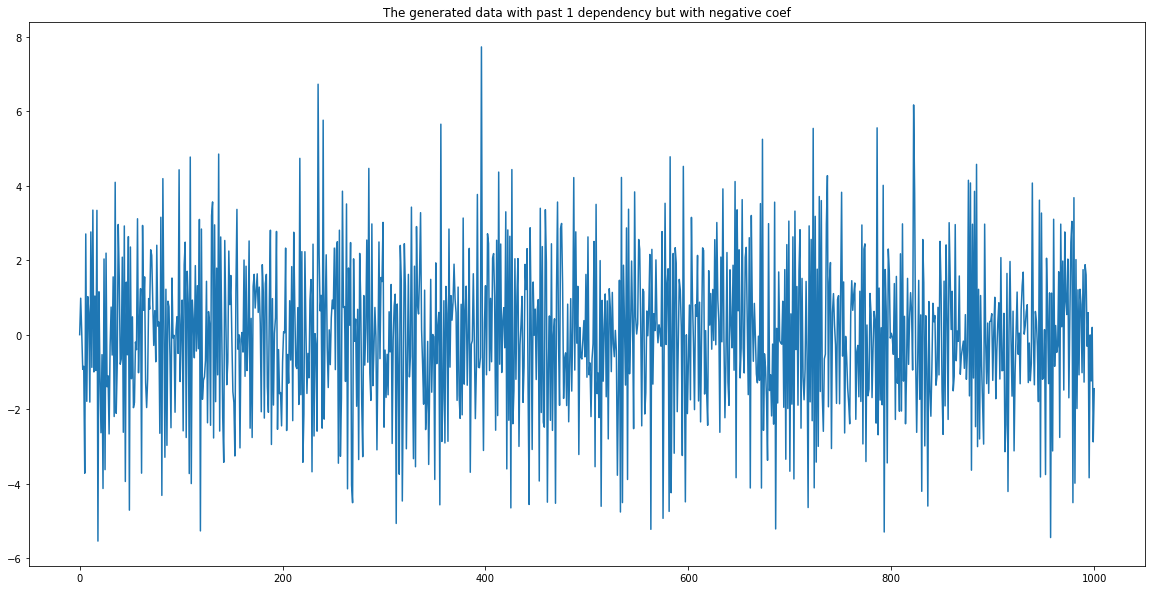

In [9]:
plt.plot(x1)
plt.title("The generated data with past 1 dependency but with negative coef");

Looks no difference! But... ↓

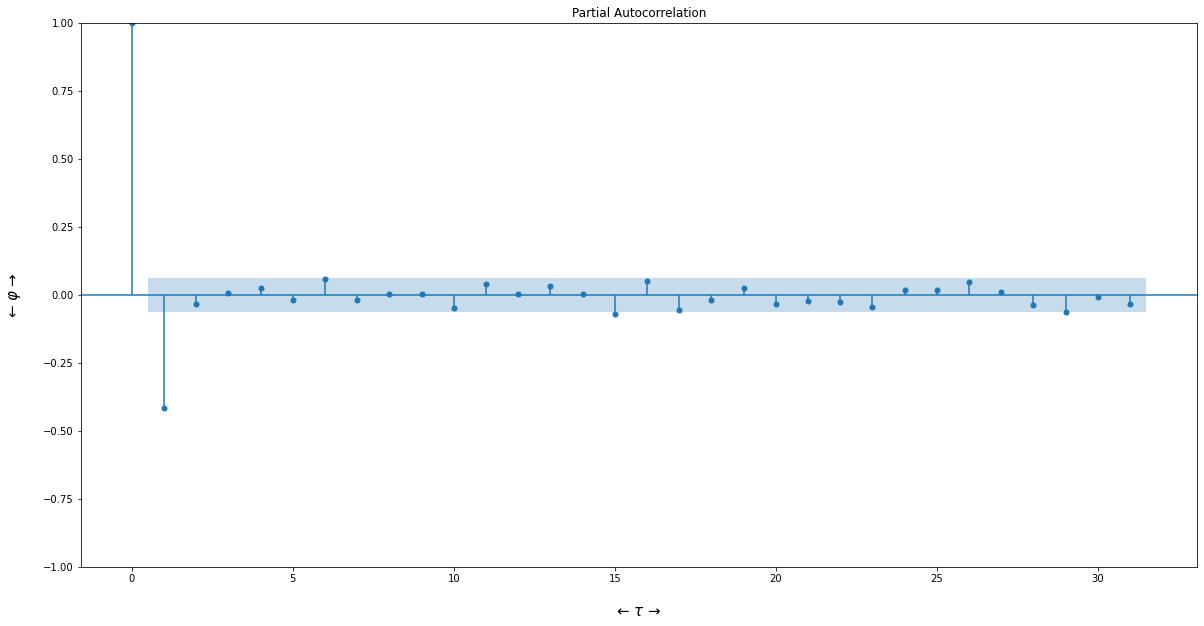

In [10]:
ax = plt.axes()
plot_pacf(x1, method="ywm", ax=ax)
ax.set_xlabel("← $\\tau$ →", labelpad=20, fontdict={"size":15})
ax.set_ylabel("← $\\varphi$ →", labelpad=20, fontdict={"size":15});

BAM! The **bar got flipped!** <br>
That makes sense becasue that value (meaning the past single value per new value) has ***negative affect*** on the new value. Which can be observed in `code` where we wrote coef as `-0.4`.

> ***So, does that mean when we run the linear regression and get the coefficient negative or possitive the correlation will be same sign?***

#### 🛤 Getting side track
*Quick try out:*

In [11]:
from sklearn.datasets import  load_boston
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# prepare the data
x = pd.DataFrame(load_boston()['data'], columns=load_boston()['feature_names'])
y = load_boston()['target']

# fit the model
model = LinearRegression().fit(x, y)

In [12]:
# label whether positive or negative (the coef signs)
label = np.where(model.coef_ < 0, "NEG", "POS")
label

array(['NEG', 'POS', 'POS', 'POS', 'NEG', 'POS', 'POS', 'NEG', 'POS',
       'NEG', 'NEG', 'POS', 'NEG'], dtype='<U3')

In [13]:
# prepare the df to see difference
result = pd.concat([x.corrwith(pd.Series(y)), pd.Series(label, index=x.columns)], axis=1)
result.columns=["Coefficient", "Sign"]
result

,Coefficient,Sign
CRIM,-0.388305,NEG
ZN,0.360445,POS
INDUS,-0.483725,POS
CHAS,0.175260,POS
NOX,-0.427321,NEG
RM,0.695360,POS
AGE,-0.376955,POS
DIS,0.249929,NEG
RAD,-0.381626,POS
TAX,-0.468536,NEG


We can clearly see that ***not all labels are confirming*** our assumption. Thus, the correlation might say it is negative relation but the regression coefficient may say it is positive effect!

In [14]:
# matching results
result[result.apply(lambda x: ((x[0] > 0) and (x[1] == "POS")) or ((x[0] < 0) & (x[1] == "NEG")), axis=1)]

,Coefficient,Sign
CRIM,-0.388305,NEG
ZN,0.360445,POS
CHAS,0.175260,POS
NOX,-0.427321,NEG
RM,0.695360,POS
TAX,-0.468536,NEG
PTRATIO,-0.507787,NEG
B,0.333461,POS
LSTAT,-0.737663,NEG


In [15]:
# different results
result[result.apply(lambda x: ((x[0] < 0) and (x[1] == "POS")) or ((x[0] > 0) & (x[1] == "NEG")), axis=1)]

,Coefficient,Sign
INDUS,-0.483725,POS
AGE,-0.376955,POS
DIS,0.249929,NEG
RAD,-0.381626,POS


Have a look, the **unmatching** rows **don't have** huge magnitude of the correlation! The are mostly below `abs(0.5)`. On the otherside, the **matching** rows are usually having the large magnitude.

Here is the link on this discussion: [Researchgate discussions](https://www.researchgate.net/post/What-does-it-indicating-If-there-is-positive-correlation-but-negative-regression-coefficient)
<br>—<br>
But still some noteworthy answers are:

1️⃣
> **When** regression coefficient and the correlation between latent constructs **do not have the same sign**, the original ***relationship between*** the two ***has been suppressed***. In general, *there are **three** reasons* for suppressor effects. <br> <br> **1.** Due to the fact that the original relationship between the two variables is so close to zero that the difference in the signs simply reflects random variation around zero. <br><br> **2.** Reason for suppression is that there are two or more variables que contain the same information and are therefore redundant. The switching of signs in this case is due to the order of the variables in the equation. In this situation the redundancy is artificially changing the signs, and one or more of the redundant variables must be eliminated.<br><br> **3.** Reason is what some call "real suppression". In this case suppression occurs because an important predictor variable, necessary in understanding the true relationship between the latent variables, suppresses the effect of another predictor variable. In the case of real suppression, if the necessary predictor is eliminated, a specification error occurs, i.e. all relevant variables are not in the model. With real suppressor effects the correct sign interpretation is that given by the path coefficient" (pp. 75-76).

2️⃣
> If you are using the *multiple regression* it **is possible** that for **effect of the intercorrelations** between the independent variables of the partial regression coefficient of an independent variable may be negative in the face of a positive correlation coefficient between this variable and the dependent variable.

Whaterver, we got to learn something new this time... which I never though about before! Thanks PACF! 🙏

#### Back from the side-track

#### Making data based on past 2 values

In [16]:
# initialize with 2 values as we need at least 2
x2 = [0, 0]
for i in range(1000):
    new_point = 0.5 * x2[-1] + -0.7 * x2[-2] +  2 * seed.randn()
    x2.append(new_point)
    
x2 = np.array(x2)

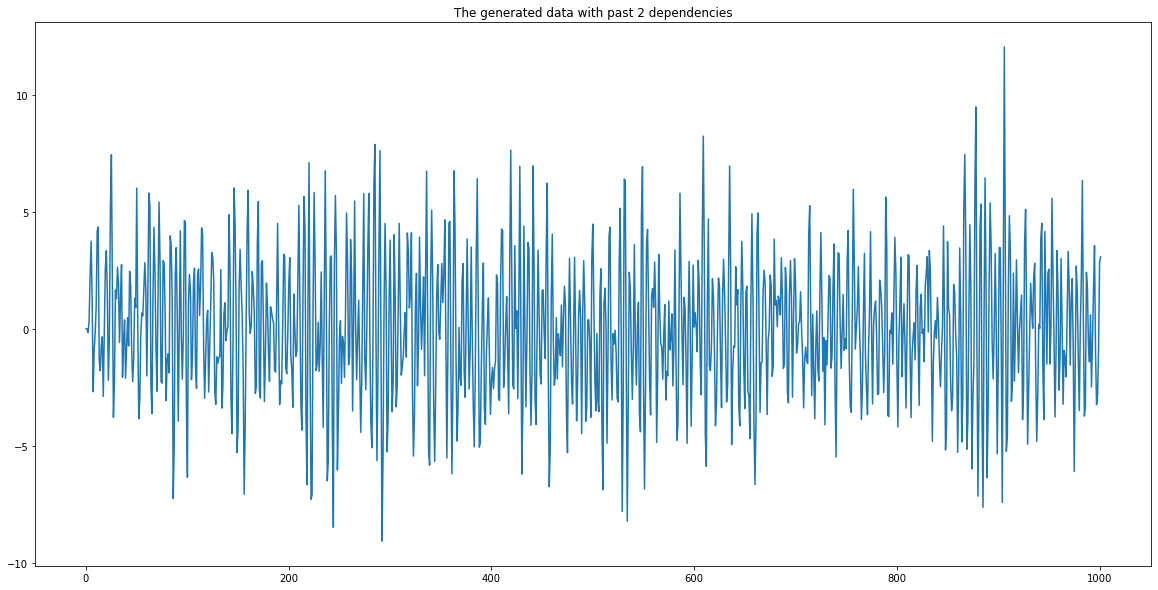

In [17]:
plt.plot(x2)
plt.title("The generated data with past 2 dependencies");

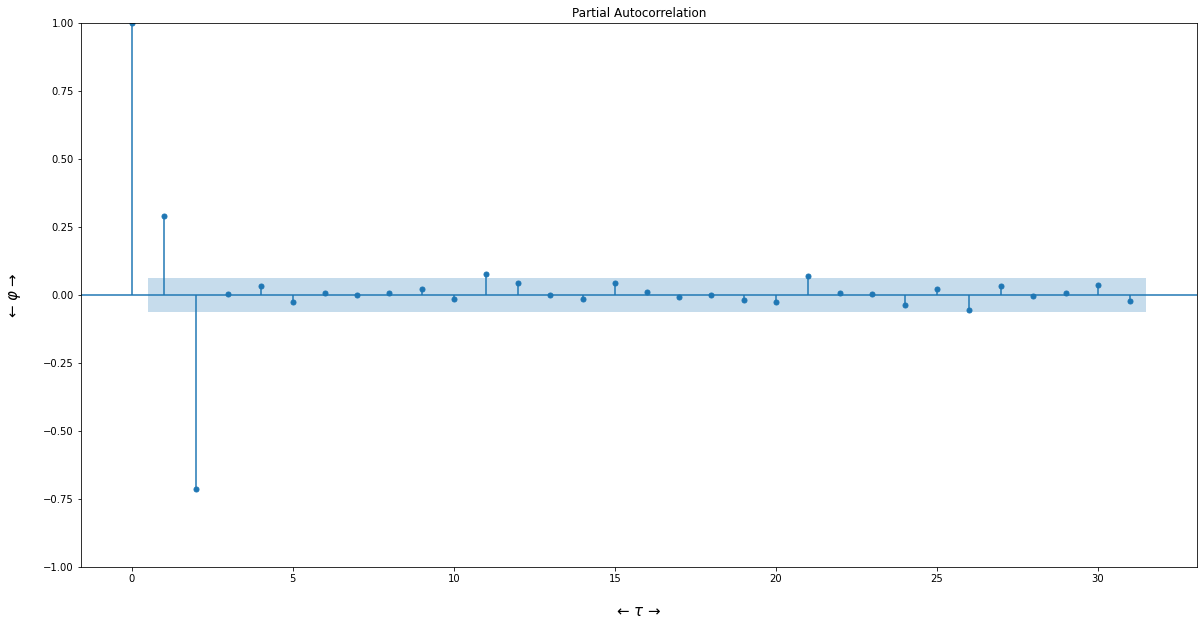

In [18]:
ax = plt.axes()
plot_pacf(x2, method="ywm", ax=ax)
ax.set_xlabel("← $\\tau$ →", labelpad=20, fontdict={"size":15})
ax.set_ylabel("← $\\varphi$ →", labelpad=20, fontdict={"size":15});

See? As expected! Here we would have chosen `p` as `2`.

#### Making data based on past 6 values (getting wild 🤭)

In [19]:
# initialize with 6 values as we need at least 6
x6 = [0, 0, 0, 0, 0, 0]
for i in range(1000):
    new_point =    0.3 * x6[-1] + -0.2 * x6[-2] \
                + -0.4 * x6[-3] +  0.3 * x6[-4] \
                + -0.5 * x6[-5] + -0.4 * x6[-6] + 0.2 * seed.randn()
    x6.append(new_point)
    
x6 = np.array(x6)

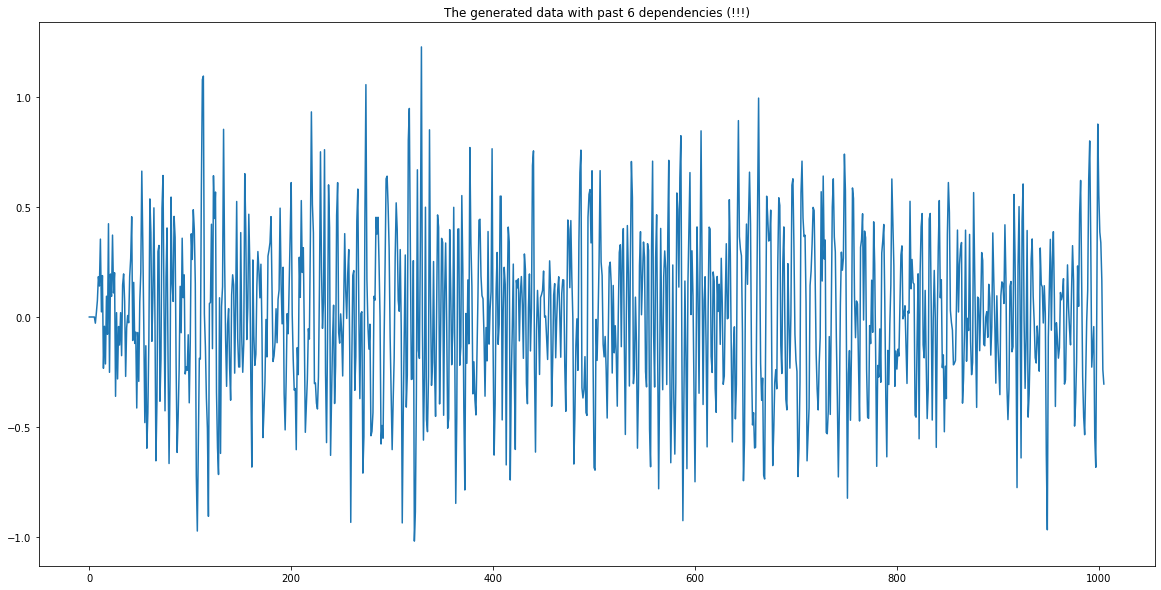

In [20]:
plt.plot(x6)
plt.title("The generated data with past 6 dependencies (!!!)");

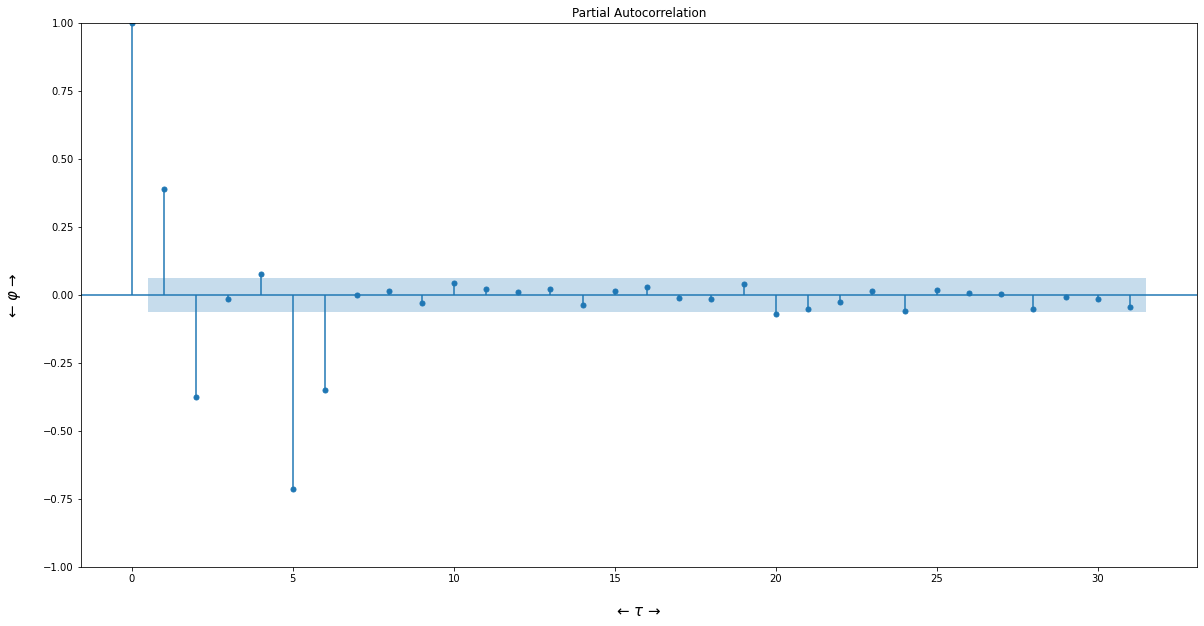

In [21]:
ax = plt.axes()
plot_pacf(x6, method="ywm", ax=ax)
ax.set_xlabel("← $\\tau$ →", labelpad=20, fontdict={"size":15})
ax.set_ylabel("← $\\varphi$ →", labelpad=20, fontdict={"size":15});

Gettin' it man! Now we would go for `p = 6`!

#### Making data based on past 3 values but they are not sequencial!

In [22]:
x5 = [0, 0, 0, 0, 0]
for i in range(1000):
    new_point =    0.3 * x5[-1] \
                + -0.2 * x5[-2] \
                + -0.4 * x5[-5] +   0.2 * seed.randn()
    x5.append(new_point)
    
x5 = np.array(x5)

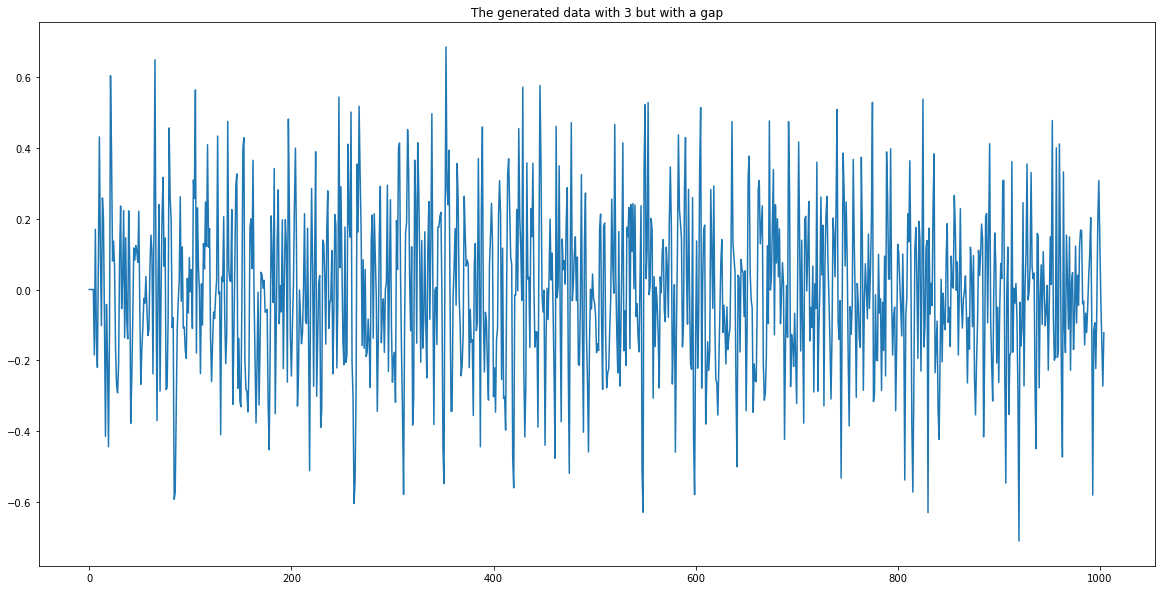

In [23]:
plt.plot(x5)
plt.title("The generated data with 3 but with a gap");

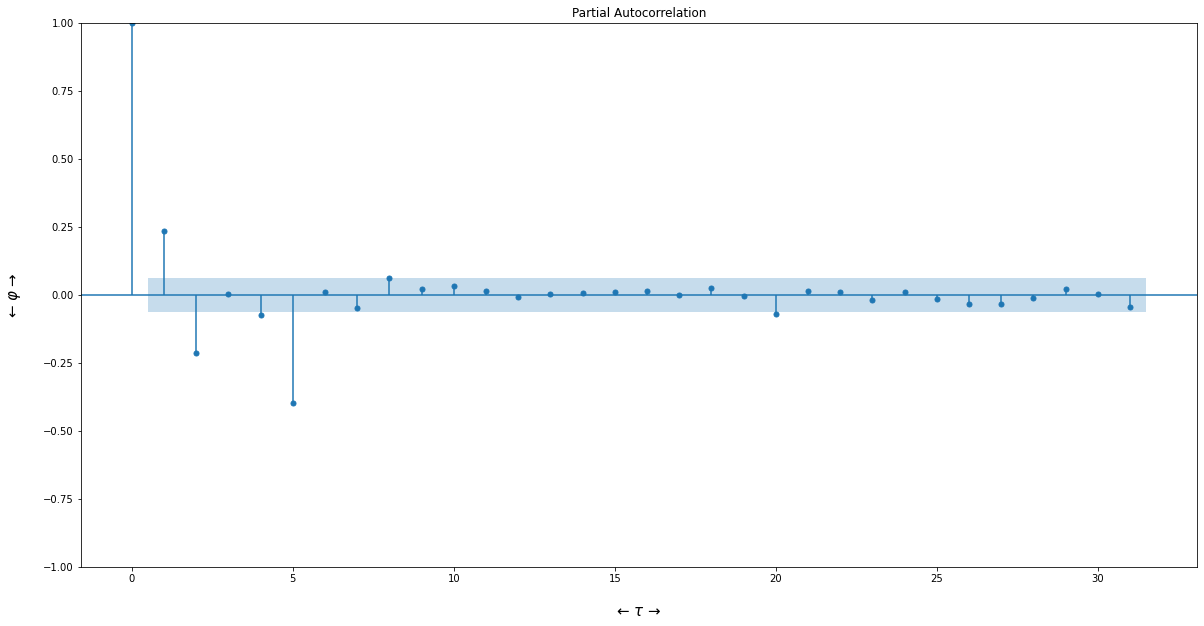

In [24]:
ax = plt.axes()
plot_pacf(x5, method="ywm", ax=ax)
ax.set_xlabel("← $\\tau$ →", labelpad=20, fontdict={"size":15})
ax.set_ylabel("← $\\varphi$ →", labelpad=20, fontdict={"size":15});

**Note** that our data is based upon 1, 2 and 5th past values. But still we are getting ***some*** PACF values for the 3 and 4th values.

Still, here we will take `p=5`.

# 

# Great!
Man! Now we know what they are. Amazing! Let's see the next topic which is Auto Arima!